## Homework 2

- Build and train a MLP Model to classify Mnist dataset

 1- MLP Network accepts 1D data. So we should flatten our 2D image, then print the dimension of the result arrays.
 
 2- Normalize data by rescaling them to (0,1) 
 
 3- Convert label arrays to 1-hot representation (`keras.utils.to_categorical`)
 
 4- Define Model
    * Hidden Layer 1: Fully Conncted + Relu Activition (e.g. 512 Nuerons)
    * Hidden Layer 2: Fully Connected + Relu Activition (e.g. 512 Neurons)
    * Outout Layer: Fully Connected + Softmax Activition
 
 
- Build and train a CNN+MLP deep learning model with Keras with followings specs for MNIST dataset:

    1. Conv2D(32, kernel_size=(3, 3), activation='relu')
    2. Conv2D(64, kernel_size=(3, 3), activation='relu')
    3. MaxPooling2D(pool_size=(2, 2))
    4. Dense(128, activation='relu')
    5. Dense(num_classes, activation='softmax')

    Also build another model with BatchNormalization and Dropout.
    Compare these two CNN + MLP models performance for test data

In [24]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils
from keras.optimizers import RMSprop, SGD
from keras.initializers import RandomNormal
from tensorflow.keras import utils

import numpy as np

In [3]:
import gc
gc.collect()

42

### Practice Model

In [4]:
batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [6]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 142

### Part 1

In [10]:
import keras
import matplotlib.pyplot as plt #This package is for plotting
%matplotlib inline  
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
from keras.initializers import RandomNormal
from keras.models import load_model
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
# Reshape x_train and x_test
x_train = np.reshape(x_train,[-1, 28*28])
x_test = np.reshape(x_test,[-1, 28*28])
print(x_train.shape)

(60000, 784)


In [13]:
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_train)

In [14]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [15]:
model2 = Sequential()
# Add the layers to model here.
model2.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer= RandomNormal(0,0.01)))
model2.add(Dense(512, activation='relu', kernel_initializer= RandomNormal(0,0.01)))
model2.add(Dense(10, activation='softmax', kernel_initializer= RandomNormal(0,0.01)))

In [16]:
sgd = SGD(lr=0.01)
model2.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics = ['accuracy'])

In [17]:
model2.summary()
# Here we saved the raw model without any training. we will use it later.
model2.save('raw_model.h5')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


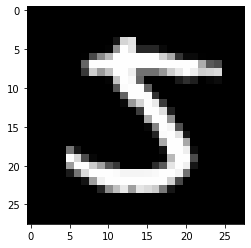

True label: 5
Predicted label: 5


In [18]:
# reload the model here:
model2 = load_model('raw_model.h5')
# generate a random number. (use numpy random.randint)
rand_num = np.random.randint(60000)
img = x_train[rand_num]
img = np.expand_dims(img, axis = 0)
predicted_label =model.predict(img, 1)
img = np.reshape(img,(28,28))
plt.imshow(img, cmap='gray' )
plt.show()
# print its label
true_label = np.argmax(y_train[rand_num])
predicted_label = np.argmax(predicted_label)
print('True label:', true_label)
print('Predicted label:', predicted_label)

### Part 2

In [51]:
from __future__ import print_function
import keras

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.datasets import mnist

In [52]:
# Loading the data

(dx_train, dy_train), (dx_test, dy_test) = mnist.load_data()

print('train data dim:', dx_train.shape)
print('test data dim:', dx_test.shape)
print('test label dim:', dy_test.shape)

print('max of training data:', np.max(dx_train))

train data dim: (60000, 28, 28)
test data dim: (10000, 28, 28)
test label dim: (10000,)
max of training data: 255


In [36]:
model3 = Sequential()
# input
model3.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
# - hidden layers -
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
# model.add(Flatten())
# output
model3.add(Dense(10, activation='softmax'))

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
print(dx_train[0].shape)
print(dx_train[1].shape)
print(dy_train[0].shape)
print(dy_test[0].shape)

(28, 28)
(28, 28)
()
()


In [53]:
img_rows, img_cols = 28, 28
dx_train = dx_train.reshape(dx_train.shape[0], img_rows, img_cols, 1)
dx_test = dx_test.reshape(dx_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# change categories to one-hot
dy_train = utils.to_categorical(dy_train, 10)
dy_test = utils.to_categorical(dy_test, 10)

print(dx_train[0].shape)
print(dx_train[1].shape)
print(dy_train[0].shape)
print(dy_test[0].shape)

(28, 28, 1)
(28, 28, 1)
(10,)
(10,)


In [39]:
# Training the model
history3 = model3.fit(x=dx_train, y=dy_train,
                   batch_size = 32,
                   epochs = 10,
                   verbose = 1,
                   validation_data=(dx_test, dy_test))
print('done')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 90s 1ms/step - loss: 0.3470 - accuracy: 0.9577 - val_loss: 0.0623 - val_accuracy: 0.9808
Epoch 2/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0500 - accuracy: 0.9845 - val_loss: 0.0741 - val_accuracy: 0.9791
Epoch 3/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0357 - accuracy: 0.9888 - val_loss: 0.0443 - val_accuracy: 0.9867
Epoch 4/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0271 - accuracy: 0.9916 - val_loss: 0.0611 - val_accuracy: 0.9855
Epoch 5/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0265 - accuracy: 0.9919 - val_loss: 0.0688 - val_accuracy: 0.9821
Epoch 6/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0184 - accuracy: 0.9945 - val_loss: 0.0668 - val_accuracy: 0.9847
Epoch 7/10
60000/60000 [==============================] - 93s 2ms/

### Part 3

In [47]:
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
from keras.layers import BatchNormalization, Dropout

model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model4.add(BatchNormalization())
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPool2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))

model4.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

print(model4.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)            

In [54]:

# Training the model
history4 = model4.fit(x=dx_train, y=dy_train,
                   batch_size = 32,
                   epochs = 10,
                   verbose = 1,
                   validation_data=(dx_test, dy_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 361s 6ms/step - loss: 0.1511 - accuracy: 0.9546 - val_loss: 0.0490 - val_accuracy: 0.9842
Epoch 2/10
60000/60000 [==============================] - 341s 6ms/step - loss: 0.0644 - accuracy: 0.9811 - val_loss: 0.0357 - val_accuracy: 0.9873
Epoch 3/10
60000/60000 [==============================] - 326s 5ms/step - loss: 0.0495 - accuracy: 0.9851 - val_loss: 0.0328 - val_accuracy: 0.9897
Epoch 4/10
60000/60000 [==============================] - 306s 5ms/step - loss: 0.0428 - accuracy: 0.9874 - val_loss: 0.0307 - val_accuracy: 0.9888
Epoch 5/10
60000/60000 [==============================] - 296s 5ms/step - loss: 0.0362 - accuracy: 0.9888 - val_loss: 0.0291 - val_accuracy: 0.9891
Epoch 6/10
60000/60000 [==============================] - 311s 5ms/step - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.0272 - val_accuracy: 0.9906
Epoch 7/10
60000/60000 [==============================] - 292s